Numerical schemes for the PDE
$$\begin{cases}
    u_t + u_x = 0, & \text{for } t > 0,\; x \in (0,1); \\
    u(x,0) = \cos(6\pi x) & \text{if } x \in [0,1/3), \\
    \qquad \quad\, = 0 & \text{if } x \in [1/3,2/3), \\
    \qquad \quad\, = \cos(12\pi x) & \text{if } x \in [2/3,1]; \\
    u(0,t) = u(1,t) & \text{for } t > 0.
\end{cases}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import schemes
import aux_funcs
import plotting

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10

'''
PDEClass

    - Stores info about a PDE and contains methods to solve it and interpolate solutions
'''
class PDEClass:
    def __init__(self, dt, dx, tmax, initialCondition):
        self.pars = {
            'dt': dt,
            'dx': dx,
            'tmax': tmax,
            'T': int(tmax / dt),
            'J': int(1 / dx),
            'Tarray': np.linspace(0, tmax, int(tmax/dt) + 1),
            'Xarray': np.linspace(0, 1, int(1/dx) + 1),
        }

        self.initialCondition = initialCondition
        self.solutionMatrix = None

    '''
    <np 2D array> = solve(method)
    
        - Accepts: A string representation of the method (e.g., 'CIR', 'upwind', etc.)
        - Returns: A 2D array of the numerical solution
    '''
    def solve(self, method):
        self.method = method
        
        match method:
            case 'upwind':
                solutionMatrix = schemes.solveUpwind(self)
            case 'LF':
                solutionMatrix = schemes.solveLaxFriedrichs(self)
            case 'CIR':
                solutionMatrix = schemes.solveCIRoptimized(self)
            case 'LaxWendroff':
                solutionMatrix = schemes.solveLaxWendroff(self)
            case 'MacCormack':
                solutionMatrix = schemes.solveMacCormack(self)
            case 'CIR-BFECC':
                solutionMatrix = schemes.solveCIRBFECCoptimized(self)

        self.solutionMatrix = solutionMatrix

        return solutionMatrix

### Upwind Scheme

In [2]:
# Requires CFL Condition
dt = 0.001
dx = 0.002
tmax = 2

upwindScheme = PDEClass(dt, dx, tmax, aux_funcs.initialCondition)
upwindSchemeSol = upwindScheme.solve('upwind')

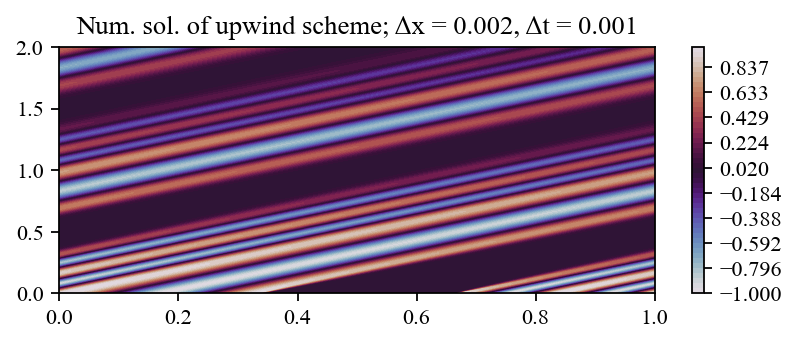

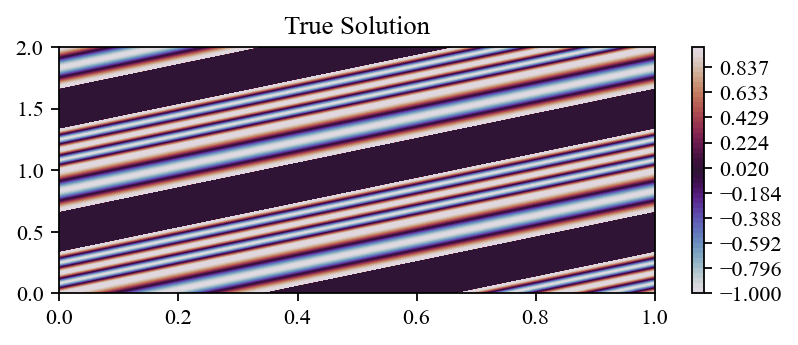

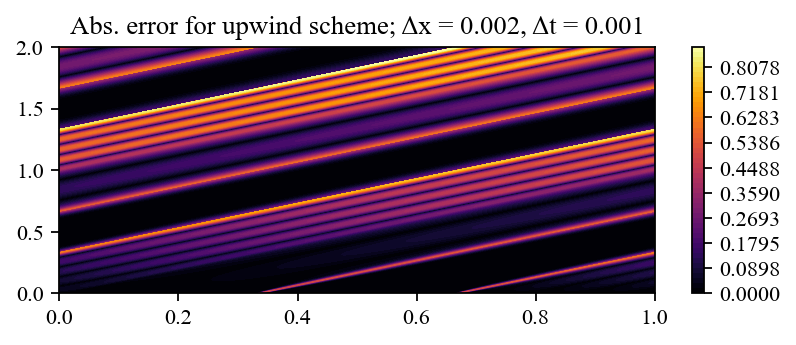

In [3]:
plotMinT = 0
plotMaxT = tmax

plotting.plotNumericalSolution(upwindScheme, plotMinT, plotMaxT)
plotting.plotTrueSolution(upwindScheme, plotMinT, plotMaxT)
plotting.plotAbsoluteError(upwindScheme, plotMinT, plotMaxT)

### CIR Scheme

In [4]:
dt = 0.01
dx = 0.005
tmax = 10

CIRscheme = PDEClass(dt, dx, tmax, aux_funcs.initialCondition)
CIRschemeSol = CIRscheme.solve('CIR')

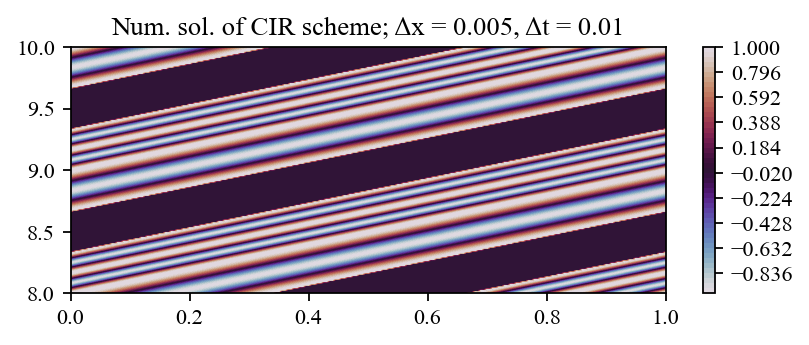

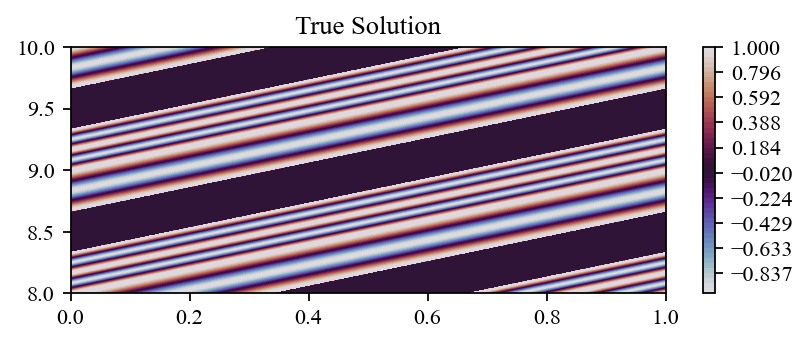

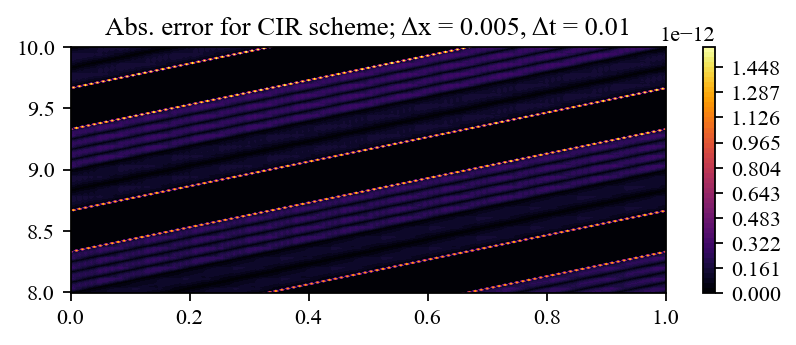

In [5]:
plotMinT = 8
plotMaxT = 10

plotting.plotNumericalSolutionInterpolated(CIRscheme, plotMinT, plotMaxT)
plotting.plotTrueSolutionInterpolated(CIRscheme, plotMinT, plotMaxT)
plotting.plotAbsoluteError(CIRscheme, plotMinT, plotMaxT)

### CIR Scheme with BFECC

In [6]:
dt = 0.01
dx = 0.005
tmax = 10

CIRBFECCscheme = PDEClass(dt, dx, tmax, aux_funcs.initialCondition)
CIRBFECCschemeSol = CIRBFECCscheme.solve('CIR-BFECC')

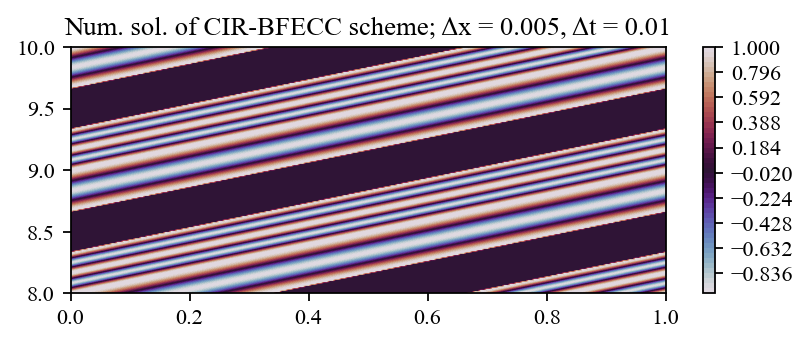

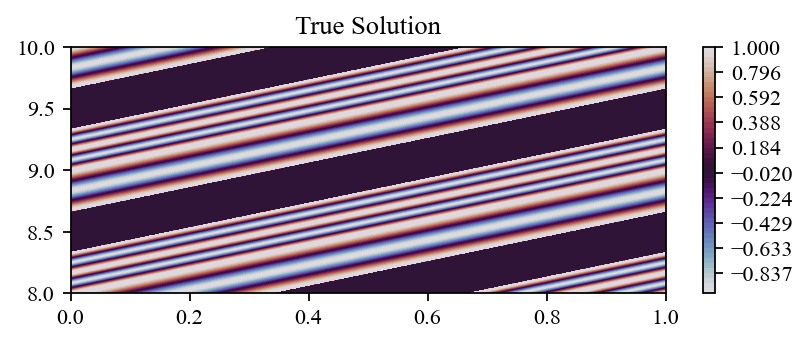

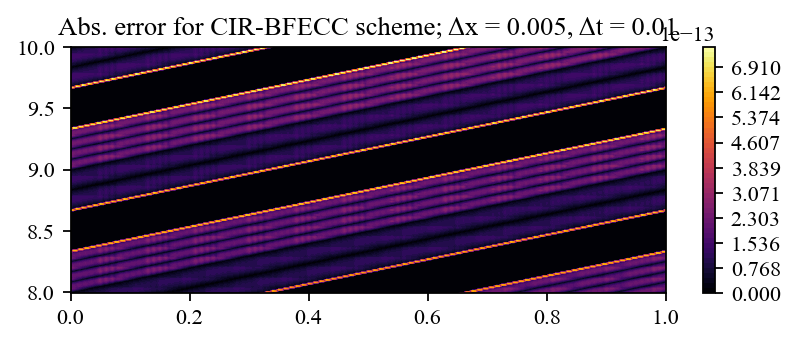

In [7]:
plotMinT = 8
plotMaxT = 10

plotting.plotNumericalSolutionInterpolated(CIRBFECCscheme, plotMinT, plotMaxT)
plotting.plotTrueSolutionInterpolated(CIRBFECCscheme, plotMinT, plotMaxT)
plotting.plotAbsoluteError(CIRBFECCscheme, plotMinT, plotMaxT)

### Lax-Friedrich Scheme

In [8]:
# Requires CFL Condition
dt = 0.0005
dx = 0.001
tmax = 2

LaxFriedrichScheme = PDEClass(dt, dx, tmax, aux_funcs.initialCondition)
LaxFriedrichSchemeSol = LaxFriedrichScheme.solve('LF')

In [ ]:
plotMinT = 0
plotMaxT = tmax

plotting.plotNumericalSolutionInterpolated(LaxFriedrichScheme, plotMinT, plotMaxT)
plotting.plotTrueSolutionInterpolated(LaxFriedrichScheme, plotMinT, plotMaxT)
plotting.plotAbsoluteError(LaxFriedrichScheme, plotMinT, plotMaxT)

### Lax-Wendroff Scheme

In [ ]:
# Requires CFL Condition
dt = 0.0005
dx = 0.001
tmax = 2

LaxWendroffScheme = PDEClass(dt, dx, tmax, aux_funcs.initialCondition)
LaxWendroffSchemeSol = LaxWendroffScheme.solve('LaxWendroff')

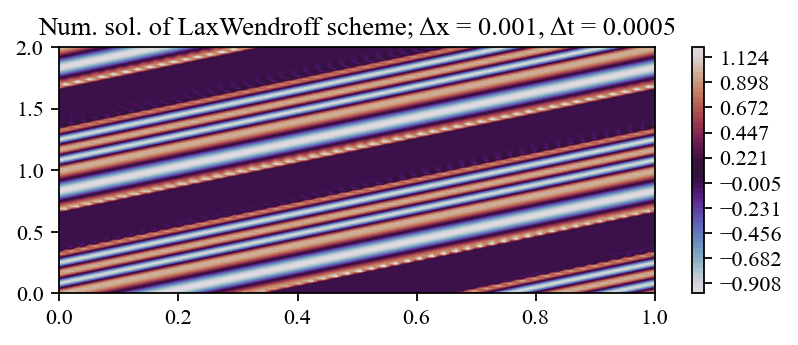

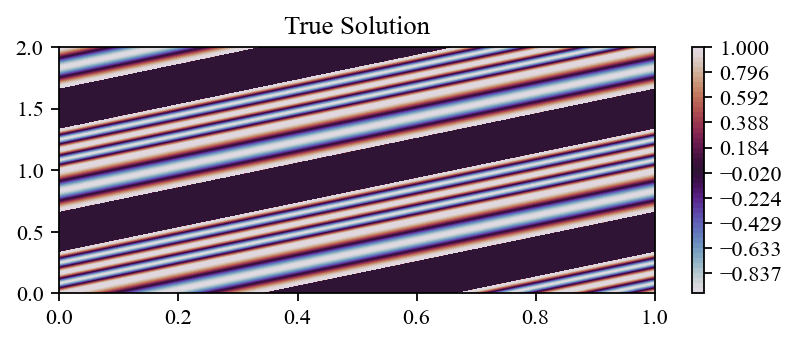

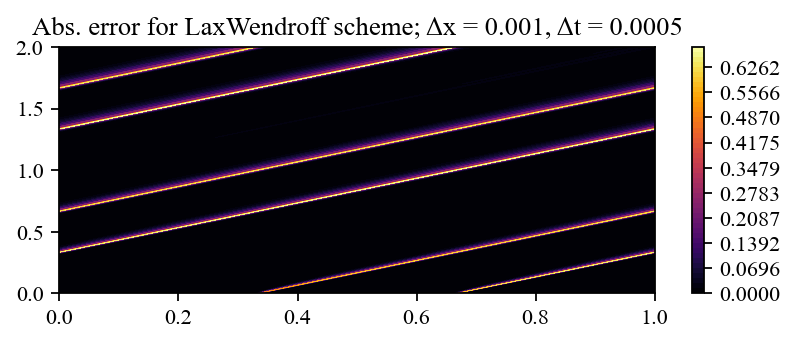

In [ ]:
plotMinT = 0
plotMaxT = tmax

plotting.plotNumericalSolutionInterpolated(LaxWendroffScheme, plotMinT, plotMaxT)
plotting.plotTrueSolutionInterpolated(LaxWendroffScheme, plotMinT, plotMaxT)
plotting.plotAbsoluteError(LaxWendroffScheme, plotMinT, plotMaxT)

### MacCormack Scheme

In [ ]:
# Requires CFL Condition
dt = 0.0005
dx = 0.0006
tmax = 10

MacCormackScheme = PDEClass(dt, dx, tmax, aux_funcs.initialCondition)
MacCormackSchemeSol = MacCormackScheme.solve('MacCormack')

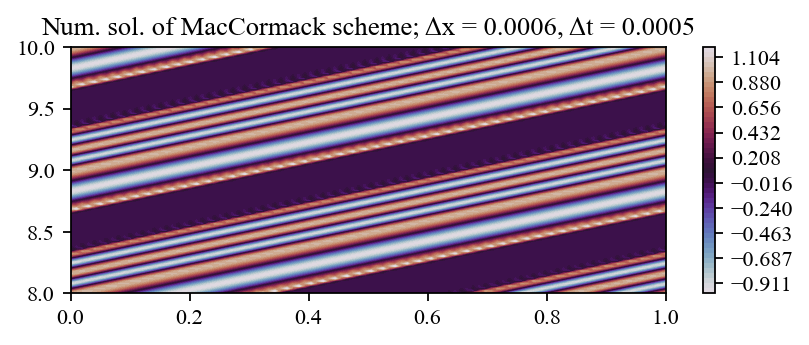

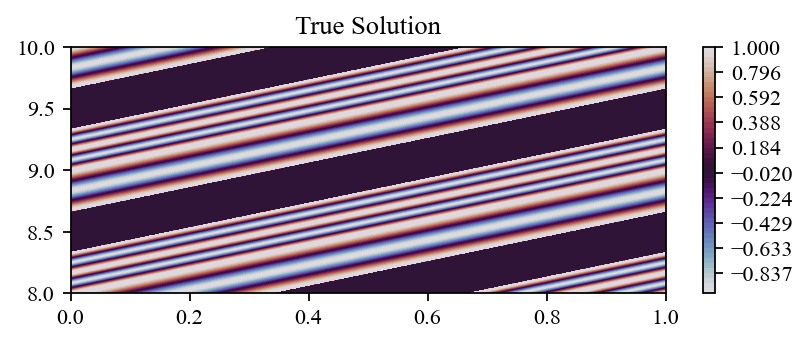

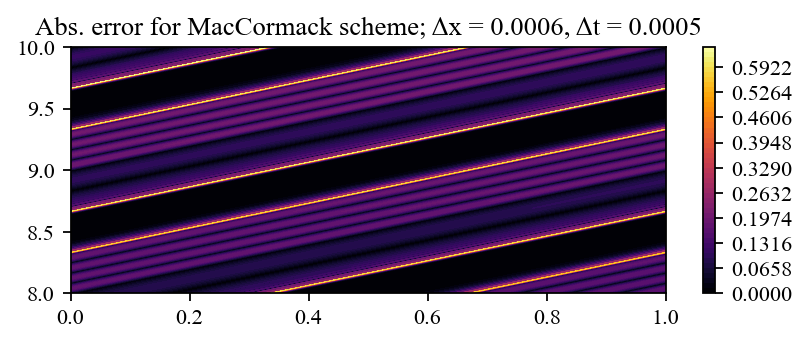

In [ ]:
plotMinT = 8
plotMaxT = tmax

plotting.plotNumericalSolutionInterpolated(MacCormackScheme, plotMinT, plotMaxT)
plotting.plotTrueSolutionInterpolated(MacCormackScheme, plotMinT, plotMaxT)
plotting.plotAbsoluteError(MacCormackScheme, plotMinT, plotMaxT)